In [1]:
from google.colab import files
Uploaded = files.upload()

Saving laptop.csv to laptop.csv


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

**Data Exploration and Understanding**

In [81]:
data = pd.read_csv('laptop.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [82]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)

In [83]:
data.drop_duplicates(inplace=True)

In [84]:
data.dropna(inplace=True)

In [85]:
print(data.isnull().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [86]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [87]:
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Ram']

,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1269,4
1270,4
1271,16
1272,2


In [88]:
data['Weight'] = data['Weight'].replace('?', np.nan)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)
mean_weight = data['Weight'].mean()
data['Weight'] = data['Weight'].fillna(mean_weight)
data['Weight']

,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1269,2.20
1270,1.80
1271,1.30
1272,1.50


In [89]:
data['Inches'] = data['Inches'].replace('?', np.nan)
data['Inches'] = data['Inches'].str.replace('.', '.').astype(float)
mean_Inches = data['Inches'].mean()
data['Inches'] = data['Inches'].fillna(mean_Inches)
data['Inches']

,Inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3
...,...
1269,15.6
1270,14.0
1271,13.3
1272,14.0


**Plot relationships between price and company**

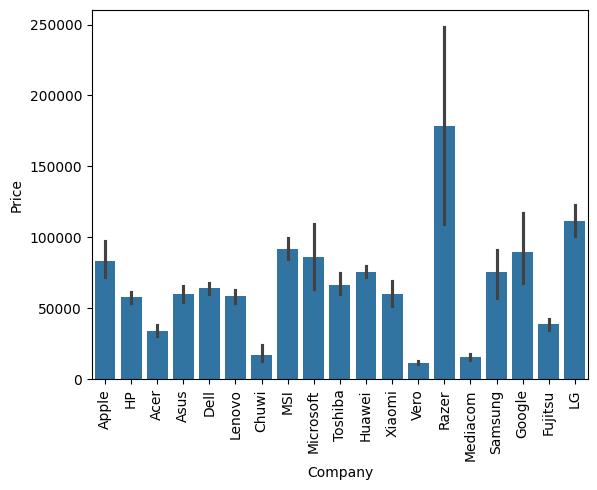

In [90]:
sns.barplot(x = 'Company', y = 'Price', data = data)
plt.xticks(rotation="vertical")
plt.show()

**Visualize price distribution**

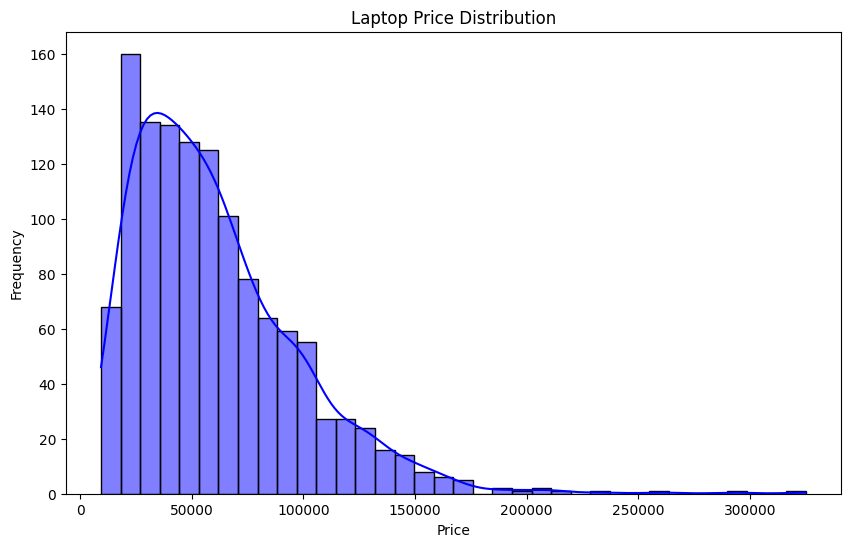

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Scatter plot between Price vs. Weight**

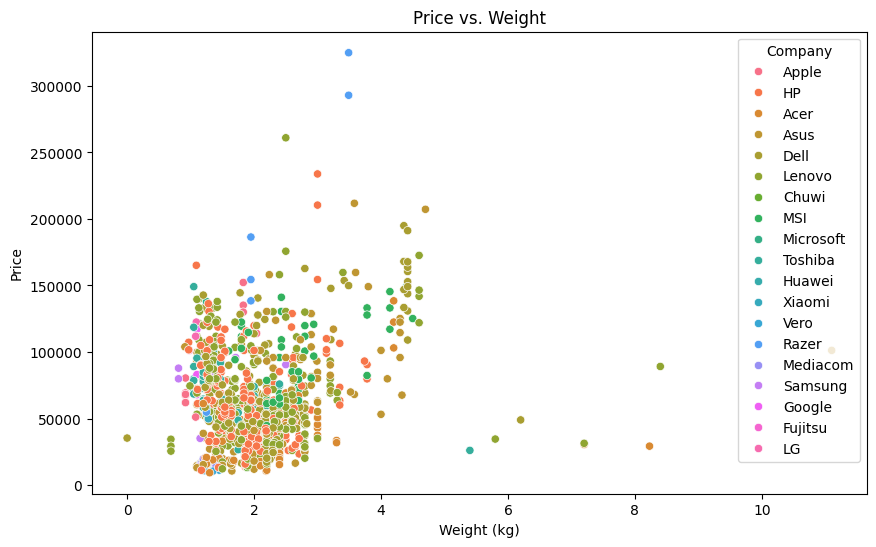

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Weight', y='Price', hue='Company')
plt.title('Price vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.show()

In [93]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   float64
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   int64  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float64
 10  Price             1244 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 116.6+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


**Process the 'Memory' column**

In [94]:
def process_memory(memory_str):
    memory_str = memory_str.lower()
    if 'ssd' in memory_str:
        storage_type = 'SSD'
    elif 'hdd' in memory_str:
        storage_type = 'HDD'
    elif 'flash storage' in memory_str:
        storage_type = 'Flash Storage'
    else:
        storage_type = 'Other'

    # Extract numerical storage size
    size_match = re.search(r'(\d+)(gb|tb)', memory_str)
    if size_match:
        size = int(size_match.group(1))
        if size_match.group(2) == 'tb':  # Convert TB to GB
            size *= 1024
    else:
        size = 0  # Default if no size is found

    return size, storage_type

data[['Storage_Size', 'Storage_Type']] = data['Memory'].apply(
    lambda x: pd.Series(process_memory(x))
)

In [95]:
data = data.drop('Memory', axis=1)

In [96]:
data['Res_X'] = data['ScreenResolution'].apply(lambda x: int(x.split()[-1].split('x')[0]))
data['Res_Y'] = data['ScreenResolution'].apply(lambda x: int(x.split()[-1].split('x')[1]))
data = data.drop('ScreenResolution', axis=1)

In [97]:
le_company = LabelEncoder()
le_TypeName = LabelEncoder()
le_Cpu = LabelEncoder()
le_Gpu = LabelEncoder()
le_OpSys = LabelEncoder()
le_Storage_Type = LabelEncoder()
le_company.fit(data['Company'])
le_TypeName.fit(data['TypeName'])
le_Cpu.fit(data['Cpu'])
le_Gpu.fit(data['Gpu'])
le_OpSys.fit(data['OpSys'])
le_Storage_Type.fit(data['Storage_Type'])

LabelEncoder()

In [98]:
label_enc = LabelEncoder()
for col in ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Storage_Type']:
    data[col] = label_enc.fit_transform(data[col])

In [99]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Storage_Size,Storage_Type,Res_X,Res_Y
0,1,4,13.3,65,8,58,8,1.37,71378.6832,128,3,2560,1600
1,1,4,13.3,63,8,51,8,1.34,47895.5232,128,0,1440,900
2,7,3,15.6,74,8,53,4,1.86,30636.0000,256,3,1920,1080
3,1,4,15.4,85,16,9,8,1.83,135195.3360,512,3,2880,1800
4,1,4,13.3,67,8,59,8,1.37,96095.8080,256,3,2560,1600


In [100]:
# Split into features and target
X = data.drop("Price", axis=1)
y = data["Price"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")

Data preprocessing complete.


**Model Development**

In [101]:
# Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Linear Regression Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_pred))
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print(f"R^2: {r2_score(y_test, lr_pred)}")

Linear Regression Performance:
Mean Absolute Error: 14843.634833711363
Mean Squared Error: 372685717.9388433
R^2: 0.680242871815754


In [102]:
# Train and evaluate Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\nRandom Forest Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print(f"R^2: {r2_score(y_test, rf_pred)}")


Random Forest Performance:
Mean Absolute Error: 9887.285302986576
Mean Squared Error: 238479655.49341175
R^2: 0.795389074224049


In [103]:
# Train and evaluate Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("\nGradient Boosting Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, gb_pred))
print("Mean Squared Error:", mean_squared_error(y_test, gb_pred))
print(f"R^2: {r2_score(y_test, gb_pred)}")


Gradient Boosting Performance:
Mean Absolute Error: 10097.934971019571
Mean Squared Error: 199515235.5888974
R^2: 0.8288197918778902


**Hyperparameter Tuning**

In [104]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print(grid_search.best_params_)
print(f"Best Cross-validated R^2: {grid_search.best_score_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validated R^2: 0.8092725733137325


**Identifying lesser-known brands**

In [110]:
brand_counts = data['Company'].value_counts()
lesser_known_brands = brand_counts[brand_counts < brand_counts.median()].index

# Filtering dataset for lesser-known brands
lesser_known_data = data[data['Company'].isin(lesser_known_brands)]
X_lesser_known = lesser_known_data.drop('Price', axis=1)
y_lesser_known = lesser_known_data['Price']

# Making predictions and evaluating performance
pred_lesser_known = grid_search.predict(X_lesser_known)

print('Evaluation for Lesser-Known Brands:')
print('RMSE:', np.sqrt(mean_squared_error(y_lesser_known, pred_lesser_known)))
print('R2 Score:', r2_score(y_lesser_known, pred_lesser_known))

Evaluation for Lesser-Known Brands:
RMSE: 6631.852621074878
R2 Score: 0.9687774178091764


**Does the brand of the laptop significantly influence its price?**

In [111]:
# Statistical analysis to assess the significance of the 'Company' feature
X_with_constant = sm.add_constant(data['Company'])
model = sm.OLS(data['Price'], X_with_constant).fit()

# Displaying the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     23.32
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           1.54e-06
Time:                        08:10:42   Log-Likelihood:                -14853.
No. Observations:                1244   AIC:                         2.971e+04
Df Residuals:                    1242   BIC:                         2.972e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.263e+04   1957.339     26.890      0.0

**Which features have the most significant impact on laptop prices?**

In [112]:
# Performance Comparison: High-End vs Budget Laptops

# Defining high-end and budget laptops based on price threshold
high_end_threshold = data['Price'].quantile(0.75)  # Top 25% priced laptops
budget_threshold = data['Price'].quantile(0.25)   # Bottom 25% priced laptops

# Creating subsets
high_end_laptops = data[data['Price'] >= high_end_threshold]
budget_laptops = data[data['Price'] <= budget_threshold]

# Defining features and target
features = data.drop('Price', axis=1).columns

# Splitting data
X_high = high_end_laptops[features]
y_high = high_end_laptops['Price']

X_budget = budget_laptops[features]
y_budget = budget_laptops['Price']

# Using the Random Forest model from the main code
# Predictions for high-end laptops
pred_high = rf.predict(X_high)

# Predictions for budget laptops
pred_budget = rf.predict(X_budget)

# Evaluation function
def evaluate_performance(category, actual, predicted):
    print(f'{category} Laptops Performance:')
    print('RMSE:', np.sqrt(mean_squared_error(actual, predicted)))
    print('R2 Score:', r2_score(actual, predicted))
    print('-' * 30)

# Evaluating performance
evaluate_performance('High-End', y_high, pred_high)
evaluate_performance('Budget', y_budget, pred_budget)

High-End Laptops Performance:
RMSE: 13889.53853637679
R2 Score: 0.8130557653963628
------------------------------
Budget Laptops Performance:
RMSE: 4015.747786216603
R2 Score: 0.5275236217136334
------------------------------


In [113]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Storage_Size,Storage_Type,Res_X,Res_Y
0,1,4,13.3,65,8,58,8,1.37,71378.6832,128,3,2560,1600
1,1,4,13.3,63,8,51,8,1.34,47895.5232,128,0,1440,900
2,7,3,15.6,74,8,53,4,1.86,30636.0000,256,3,1920,1080
3,1,4,15.4,85,16,9,8,1.83,135195.3360,512,3,2880,1800
4,1,4,13.3,67,8,59,8,1.37,96095.8080,256,3,2560,1600


In [114]:
data['Company'] = le_company.inverse_transform(data['Company'])
data['TypeName'] = le_TypeName.inverse_transform(data['TypeName'])
data['Cpu'] = le_Cpu.inverse_transform(data['Cpu'])
data['Gpu'] = le_Gpu.inverse_transform(data['Gpu'])
data['OpSys'] = le_OpSys.inverse_transform(data['OpSys'])
data['Storage_Type'] = le_Storage_Type.inverse_transform(data['Storage_Type'])

In [115]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Storage_Size,Storage_Type,Res_X,Res_Y
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,SSD,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,128,Flash Storage,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,SSD,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,SSD,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,SSD,2560,1600


**Real-Time Predictions**

In [119]:
new_data = pd.DataFrame({
    'Company': ['Apple'],
    'TypeName': ['Ultrabook'],
    'Inches': [13.3],
    'Cpu': ['Intel Core i5 1.8GHz'],
    'Ram': [8],
    'Storage_Size': [128],
    'Storage_Type': ['SSD'],
    'Gpu': ['Intel Iris Plus Graphics 640	'],
    'OpSys': ['macOS'],
    'Weight': [1.37],
    'Res_X': [2560],
    'Res_Y': [1600]
}, columns=X_train.columns)

for col in ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Storage_Type']:
    # Ensure the value is in the encoder's classes
    if new_data[col][0] in label_enc.classes_:
        new_data[col] = label_enc.transform(new_data[col])
    else:
        # Handle unseen values, e.g., assign a default value or raise an error
        new_data[col] = -1

predicted_price = grid_search.predict(new_data)
print('Predicted Price:', np.round(predicted_price,2))

Predicted Price: [69486.23]


**Which features have the most significant impact on laptop prices?**

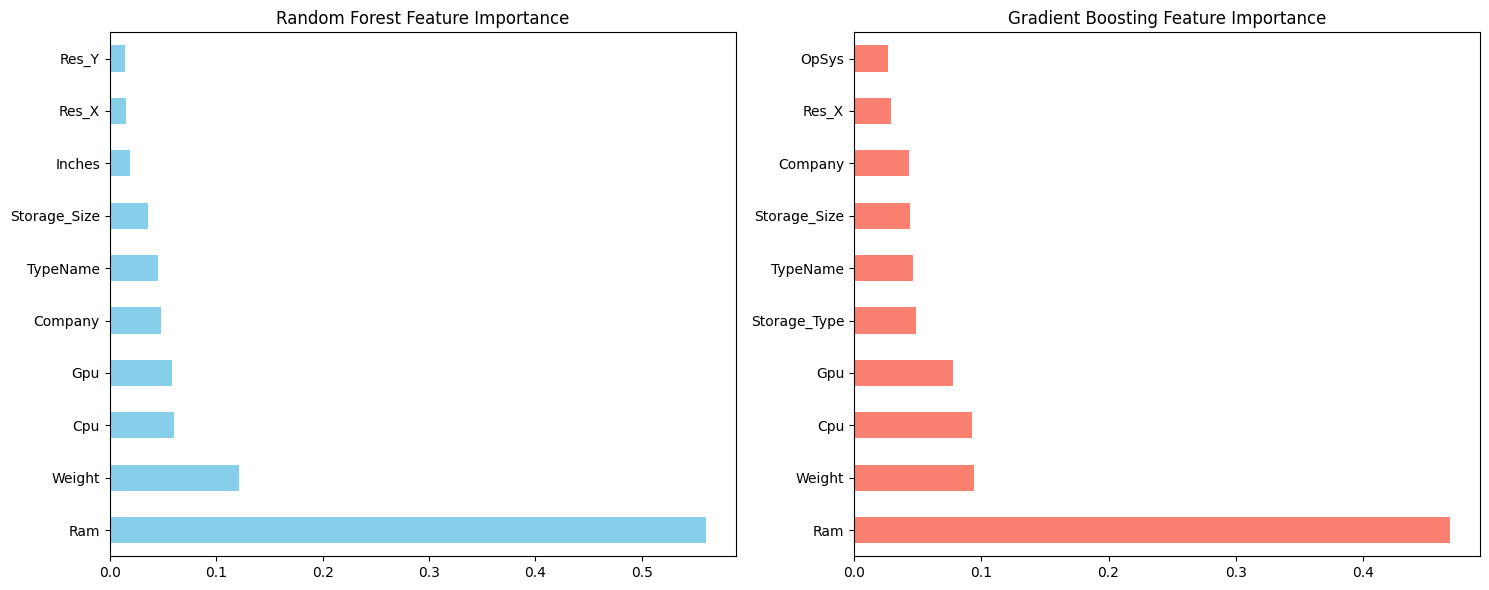

In [120]:
# Feature importance from Random Forest
feature_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Feature importance from Gradient Boosting
feature_importances_gb = pd.Series(gb.feature_importances_, index=X.columns)

# Plotting feature importance side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

feature_importances_rf.nlargest(10).plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Random Forest Feature Importance')

feature_importances_gb.nlargest(10).plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()

**Correlation Heatmap**

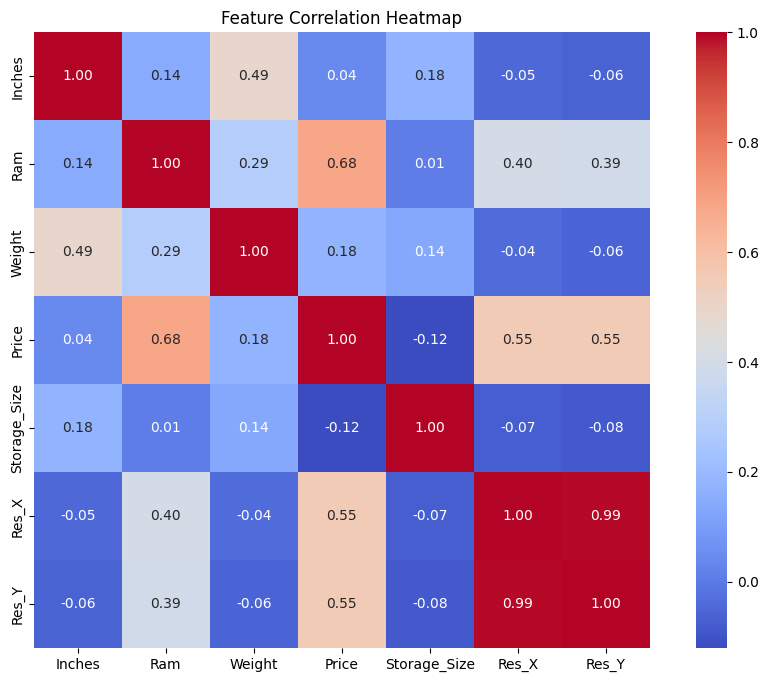

In [121]:
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=np.number)
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()